In [1]:
# importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# loading the raw data
data = pd.read_excel('../data/raw_data/Online Retail.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- The dataset has ~ 542K entries.
- There are some Null values for "Description" and quite a lot for "CutsomerID"

In [3]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data[data['Description'].isnull()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
1988,536550,85044,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2024,536552,20950,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
2025,536553,37461,NaN,3,2010-12-01 14:35:00,0.0,NaN,United Kingdom
2026,536554,84670,NaN,23,2010-12-01 14:35:00,0.0,NaN,United Kingdom
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom


In [5]:
data[data['CustomerID'].isnull()].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


- So there seem to be some common entries where both "Description" and "CustomerID" are Null.
- Both of these can't be imputed with the data we have, so they need to be removed.

In [6]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


Text(0.5, 1.0, "'UnitPrice' distribution")

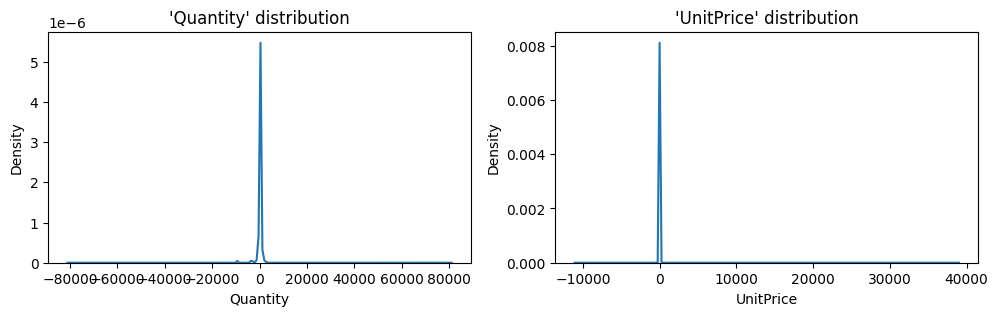

In [7]:
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.kdeplot(data=data,x='Quantity')
plt.title("'Quantity' distribution")

plt.subplot(1,2,2)
sns.kdeplot(data=data,x='UnitPrice')
plt.title("'UnitPrice' distribution")

- "Quantity" has a very skewed distribution and has got negative values. There are reasons like returned orders that can explain negative values,we will see.
- "UnitPrice" is also skewed and has negative values too. Zero "UnitPrice" can indicate promotional items or sample items but negative values are usually data entry error.

In [8]:
# Let us look at "Quantity"
data[data['Quantity'] <=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [9]:
data[data['UnitPrice']<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


- **Invoice number :** Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'C', it indicates a cancellation. 
- **StockCode :** Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. 
- So, negative 'InvoiceNo' values are indeed cancelled orders,and need to be removed.
- Some overlap between "UnitPrice" being negative and "Description" being Null too.
- While we are at it ,we should check if other transactions meet the code for 'StockCode' and 'InvoiceNo'.

In [10]:
data['InvoiceNo'].str.replace('[0-9]','',regex=True).unique()

array([nan, 'C', 'A'], dtype=object)

In [11]:
data[data['InvoiceNo'].str.startswith('A',na=False)] 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


There seem to be another type of "InvoiceNo" present. These entries also need to be removed for our analysis.

In [12]:
data['StockCode'] = data['StockCode'].astype('str')
data[data['StockCode'].str.match('^\\d{5}$') == False]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
...,...,...,...,...,...,...,...,...
541778,581578,84997C,CHILDRENS CUTLERY POLKADOT BLUE,8,2011-12-09 12:16:00,4.15,12713.0,Germany
541809,581579,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2011-12-09 12:19:00,1.79,17581.0,United Kingdom
541838,581580,84993A,75 GREEN PETIT FOUR CASES,2,2011-12-09 12:20:00,0.42,12748.0,United Kingdom
541844,581580,85049A,TRADITIONAL CHRISTMAS RIBBONS,1,2011-12-09 12:20:00,1.25,12748.0,United Kingdom


- So,we got ~39K entries which doesn't follow the usual 'StockCode'.
- I think we have to assume that these are genuine, the "85123A" types. But neverthless,let's look at any other StockCode present.

In [13]:
data[(data['StockCode'].str.match('^\\d{5}$') == False) & (data['StockCode'].str.match('^\\d{5}[a-zA-z]+$') == False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662.0,Germany
1423,536540,C2,CARRIAGE,1,2010-12-01 14:05:00,50.00,14911.0,EIRE
...,...,...,...,...,...,...,...,...
541540,581498,DOT,DOTCOM POSTAGE,1,2011-12-09 10:26:00,1714.17,NaN,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541730,581570,POST,POSTAGE,1,2011-12-09 11:59:00,18.00,12662.0,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.0,Germany


In [14]:
data[(data['StockCode'].str.match('^\\d{5}$') == False) & (data['StockCode'].str.match('^\\d{5}[a-zA-z]+$') == False)]['StockCode'].unique()

array(['POST', 'D', 'C2', 'DOT', 'M', 'BANK CHARGES', 'S', 'AMAZONFEE',
       'DCGS0076', 'DCGS0003', 'gift_0001_40', 'DCGS0070', 'm',
       'gift_0001_50', 'gift_0001_30', 'gift_0001_20', 'DCGS0055',
       'DCGS0072', 'DCGS0074', 'DCGS0069', 'DCGS0057', 'DCGSSBOY',
       'DCGSSGIRL', 'gift_0001_10', 'PADS', 'DCGS0004', 'DCGS0073',
       'DCGS0071', 'DCGS0068', 'DCGS0067', 'DCGS0066P', 'B', 'CRUK'],
      dtype=object)

So quite a lot of them that don't follow our expected patterns. All need to be removed.

In [15]:
# created a copy of the raw data for processing
cleaned_data = data.copy()

In [16]:
# Cleaning InvoiceNo
cleaned_data['InvoiceNo'] = cleaned_data['InvoiceNo'].astype('str')
mask = (
    cleaned_data['InvoiceNo'].str.match('^\\d{6}') == True
)

cleaned_data = cleaned_data[mask]

cleaned_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [17]:
# Cleaning StockCode
cleaned_data['StockCode'] = cleaned_data['StockCode'].astype('str')

mask = (
    (cleaned_data['StockCode'].str.match('^\\d{5}$') == True)              # exactly 5 digits
    | (cleaned_data['StockCode'].str.match('^\\d{5}[a-zA-Z]+$') == True)   # 5 digits long followed by letters             
)

cleaned_data = cleaned_data[mask]
cleaned_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [18]:
# removing the NULL value records of "Description" and "CustomerID"
cleaned_data.dropna(subset=['CustomerID','Description'],axis=0,inplace=True)
cleaned_data

C:\Users\HP\AppData\Local\Temp\ipykernel_22300\3567923199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.dropna(subset=['CustomerID','Description'],axis=0,inplace=True)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [19]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 396370 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    396370 non-null  object        
 1   StockCode    396370 non-null  object        
 2   Description  396370 non-null  object        
 3   Quantity     396370 non-null  int64         
 4   InvoiceDate  396370 non-null  datetime64[ns]
 5   UnitPrice    396370 non-null  float64       
 6   CustomerID   396370 non-null  float64       
 7   Country      396370 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.2+ MB


In [20]:
cleaned_data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,396370.000000,396370,396370.000000,396370.000000
mean,13.046474,2011-07-11 00:04:30.985594624,2.867983,15301.602071
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:16:00,1.250000,13975.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:41:00,3.750000,16803.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,180.733597,NaN,4.264566,1709.982593


In [21]:
# checking the 'UnitPrice' = 0 entries
cleaned_data[cleaned_data['UnitPrice'] == 0].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom


In [22]:
# Only keeping the positive values
cleaned_data = cleaned_data[cleaned_data['UnitPrice'] > 0]

In [23]:
cleaned_data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,396337.000000,396337,396337.000000,396337.000000
mean,13.012547,2011-07-11 00:04:38.980463616,2.868222,15301.689416
min,1.000000,2010-12-01 08:26:00,0.040000,12346.000000
25%,2.000000,2011-04-07 11:16:00,1.250000,13975.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:41:00,3.750000,16803.000000
max,80995.000000,2011-12-09 12:50:00,649.500000,18287.000000
std,179.641245,NaN,4.264663,1709.961948


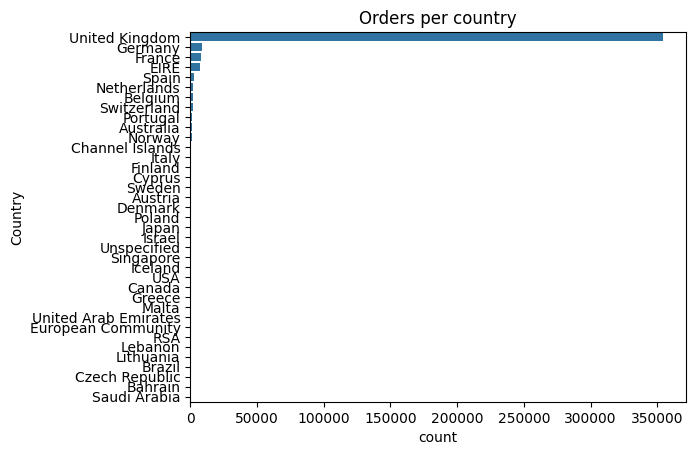

In [24]:
# checking the country wise distribution
country_df = cleaned_data['Country'].value_counts().reset_index()
sns.barplot(country_df,x='count',y='Country')
plt.title('Orders per country');

In [25]:
print(f"Percenatge of total orders that are from UK customers: {len(cleaned_data[cleaned_data['Country'] == 'United Kingdom'])*100.0/len(cleaned_data)}")
print(f"Percenatge of total orders that are from UK customers: {len(cleaned_data[cleaned_data['Country'] == 'Germany'])*100.0/len(cleaned_data)}")
print(f"Percenatge of total orders that are from UK customers: {len(cleaned_data[cleaned_data['Country'] == 'France'])*100.0/len(cleaned_data)}")
print(f"Percenatge of total orders that are from UK customers: {len(cleaned_data[cleaned_data['Country'] == 'EIRE'])*100.0/len(cleaned_data)}")

Percenatge of total orders that are from UK customers: 89.31414427620939
Percenatge of total orders that are from UK customers: 2.1845046008825824
Percenatge of total orders that are from UK customers: 2.0270628278459997
Percenatge of total orders that are from UK customers: 1.8004879685722


Since the data is from an online retail based out of United Kingdom, it was expected that we will see more orders from UK. <br>
But the scale is something,almost 90% orders were from UK based customers. <br>
The next countries are Germany,France and EIRE with miniscule percentages. 

In [26]:
#Now let's check the total quantity and by country
qunat_df = cleaned_data.groupby("Country")["Quantity"].agg('sum').reset_index()
qunat_df.sort_values('Quantity',ascending=False).head(10)

,Country,Quantity
35,United Kingdom,4249507
23,Netherlands,200258
10,EIRE,140175
14,Germany,118139
13,France,110637
0,Australia,83900
31,Sweden,36042
32,Switzerland,29980
30,Spain,27731
19,Japan,26016


As thought, UK stands out again and the other top countries are more or less same .

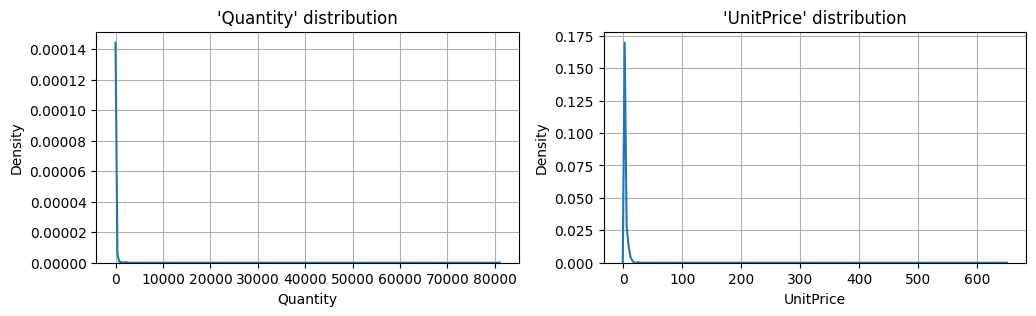

In [27]:
# checking the distribution of Quantity and UnitPrice
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.kdeplot(data=cleaned_data,x='Quantity')
plt.title("'Quantity' distribution")
plt.grid()

plt.subplot(1,2,2)
sns.kdeplot(data=cleaned_data,x='UnitPrice')
plt.title("'UnitPrice' distribution")
plt.grid()
plt.show();

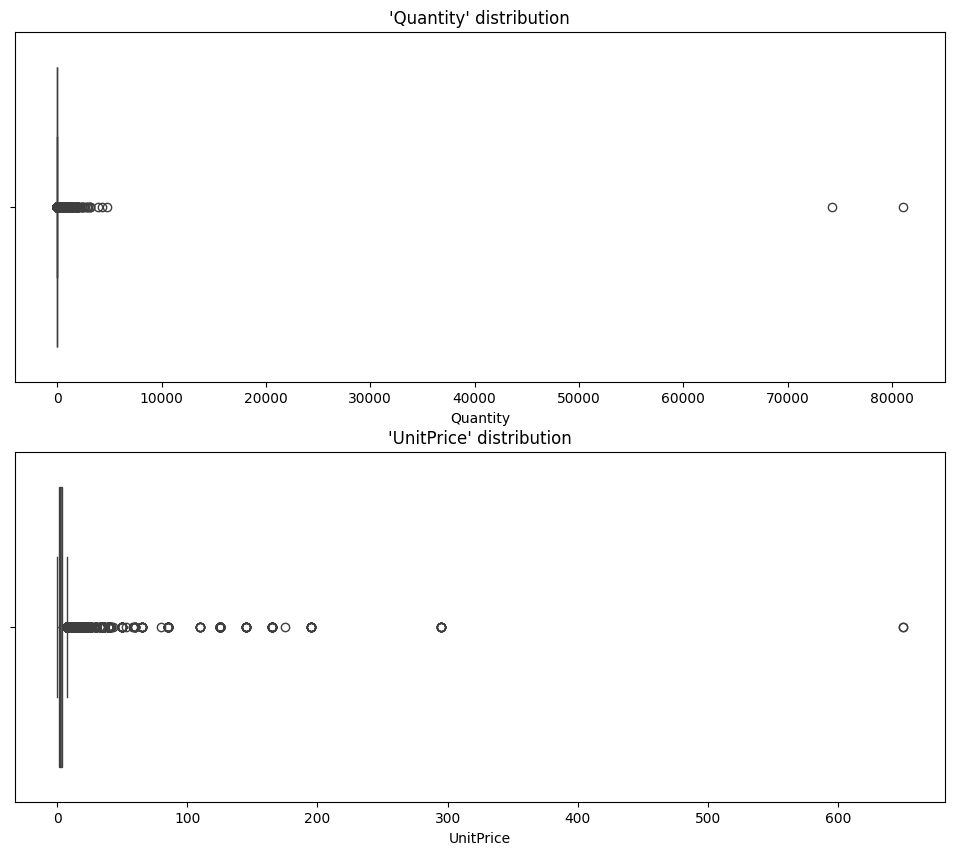

In [28]:
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.boxplot(data=cleaned_data,x='Quantity')
plt.title("'Quantity' distribution")

plt.subplot(2,1,2)
sns.boxplot(data=cleaned_data,x='UnitPrice')
plt.title("'UnitPrice' distribution")
plt.show();

1. **Quantity Distribution**
- Heavy right-skewed with a long tail up to ~80,000.
- Most values are clustered near low quantities (likely between 1–12).
- Some extremely high values (bulk orders or errors).

2. **UnitPrice Distribution**
- Also right-skewed, with values mostly concentrated below £5.
- A few outliers with very high prices (> £100–600), likely:
    - Data entry errors
    - Bundled product entries
    - Niche expensive items

In [29]:
# 99.9th percentile values
q_thresh = cleaned_data['Quantity'].quantile(0.999)
up_thresh = cleaned_data['UnitPrice'].quantile(0.999)
print(f"99.9th percentile value for 'quantity':{q_thresh}")
print(f"99.9th percentile value for 'UnitPrice':{up_thresh}")

99.9th percentile value for 'quantity':504.0
99.9th percentile value for 'UnitPrice':33.17576000001631


In [30]:
q_outliers_data = cleaned_data[cleaned_data['Quantity'] >= q_thresh ]
# getting the top most entries
q_outliers_data.sort_values('Quantity',ascending=False).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609.0,United Kingdom
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749.0,United Kingdom
433788,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2011-11-02 11:24:00,0.32,16308.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom


In [31]:
# removing the top-2 outliers
q1 = q_outliers_data.copy()
q1 = q1[~((q1['Quantity'] == 80995) | (q1['Quantity'] == 74215))]
q1.sort_values('Quantity',ascending=False).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2011-10-27 12:26:00,0.21,12901.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00,0.72,13135.0,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00,0.82,18087.0,United Kingdom
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2011-07-19 17:04:00,0.06,14609.0,United Kingdom
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749.0,United Kingdom
433788,573995,16014,SMALL CHINESE STYLE SCISSOR,3000,2011-11-02 11:24:00,0.32,16308.0,United Kingdom
291249,562439,84879,ASSORTED COLOUR BIRD ORNAMENT,2880,2011-08-04 18:06:00,1.45,12931.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom
201149,554272,21977,PACK OF 60 PINK PAISLEY CAKE CASES,2700,2011-05-23 13:08:00,0.42,12901.0,United Kingdom


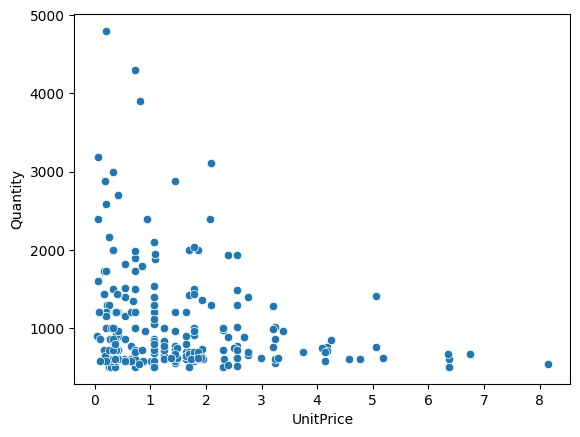

In [32]:
sns.scatterplot(q1,x='UnitPrice',y='Quantity');

- We can see that more than 99.9% of the entries are for 'Quantity' less than ~504. These transactions can be considered bulk orders or test entries.
- Also, the two entries with the highest 'Quantity' are way off in the range.
- You can see in the scatter plot that most of the transactions for high 'quantity' are for items with 'UnitPrice' less than 3.

In [33]:
# UnitPrice outliers
up_outliers_data = cleaned_data[cleaned_data['UnitPrice'] >= up_thresh ]
up_outliers_data.sort_values('UnitPrice',ascending=False).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,2011-06-10 15:33:00,649.5,15098.0,United Kingdom
222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2011-06-10 15:28:00,649.5,15098.0,United Kingdom
133994,547814,22656,VINTAGE BLUE KITCHEN CABINET,1,2011-03-25 14:19:00,295.0,13452.0,United Kingdom
51636,540647,22655,VINTAGE RED KITCHEN CABINET,1,2011-01-10 14:57:00,295.0,17406.0,United Kingdom
32484,539080,22655,VINTAGE RED KITCHEN CABINET,1,2010-12-16 08:41:00,295.0,16607.0,United Kingdom
205759,554836,22655,VINTAGE RED KITCHEN CABINET,1,2011-05-26 16:25:00,295.0,13015.0,United Kingdom
118769,546480,22656,VINTAGE BLUE KITCHEN CABINET,1,2011-03-14 11:38:00,295.0,13452.0,United Kingdom
82768,543253,22655,VINTAGE RED KITCHEN CABINET,1,2011-02-04 15:32:00,295.0,14842.0,United Kingdom
4989,536835,22655,VINTAGE RED KITCHEN CABINET,1,2010-12-02 18:06:00,295.0,13145.0,United Kingdom
171178,551393,22656,VINTAGE BLUE KITCHEN CABINET,1,2011-04-28 12:22:00,295.0,14973.0,United Kingdom


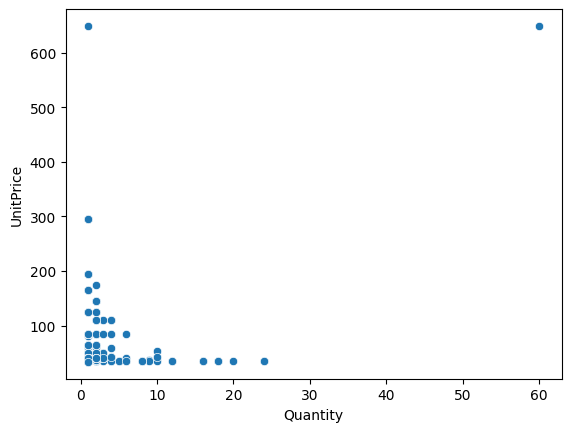

In [34]:
# plotting
sns.scatterplot(up_outliers_data,x='Quantity',y='UnitPrice');

In [35]:
# removing the top outliers
up1 = up_outliers_data.copy()
up1 = up1[~((up1['UnitPrice'] == 649.5) | (up1['UnitPrice'] == 295))]
up1.sort_values('UnitPrice',ascending=False).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
156999,550185,22826,LOVE SEAT ANTIQUE WHITE METAL,1,2011-04-14 18:22:00,195.0,17142.0,United Kingdom
112775,545900,22826,LOVE SEAT ANTIQUE WHITE METAL,1,2011-03-07 17:42:00,195.0,17817.0,United Kingdom
156737,550163,22826,LOVE SEAT ANTIQUE WHITE METAL,1,2011-04-14 16:26:00,195.0,14154.0,United Kingdom
114795,546088,22826,LOVE SEAT ANTIQUE WHITE METAL,1,2011-03-09 11:44:00,195.0,12881.0,United Kingdom
166111,550890,22826,LOVE SEAT ANTIQUE WHITE METAL,1,2011-04-21 12:00:00,195.0,14711.0,United Kingdom
182648,552560,22826,LOVE SEAT ANTIQUE WHITE METAL,1,2011-05-10 11:48:00,195.0,17581.0,United Kingdom
183128,552648,22826,LOVE SEAT ANTIQUE WHITE METAL,1,2011-05-10 13:40:00,195.0,17581.0,United Kingdom
191600,553380,22826,LOVE SEAT ANTIQUE WHITE METAL,1,2011-05-16 15:29:00,195.0,17190.0,United Kingdom
220298,556181,22826,LOVE SEAT ANTIQUE WHITE METAL,1,2011-06-09 11:32:00,195.0,15407.0,United Kingdom
110843,545698,22826,LOVE SEAT ANTIQUE WHITE METAL,1,2011-03-06 14:44:00,195.0,15572.0,United Kingdom


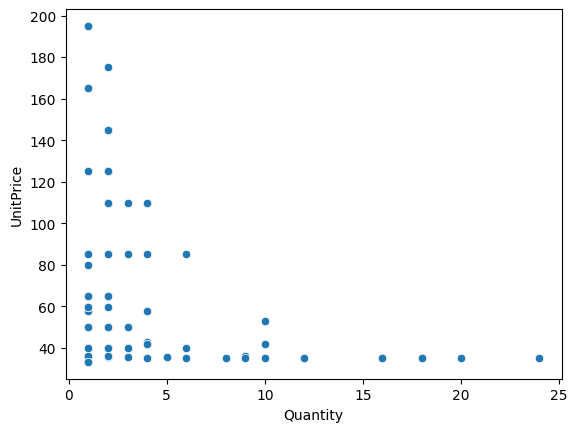

In [36]:
sns.scatterplot(up1,x='Quantity',y='UnitPrice');

- Similar observations, few entries have 'UnitPrice' incredibly high.
- They can be considered niche products,with orders of "Quantity" less than 10 as visible.
- Outlier handling will be done in the specific problem,cause there are analysese where you can drop them and where you shouldn't.

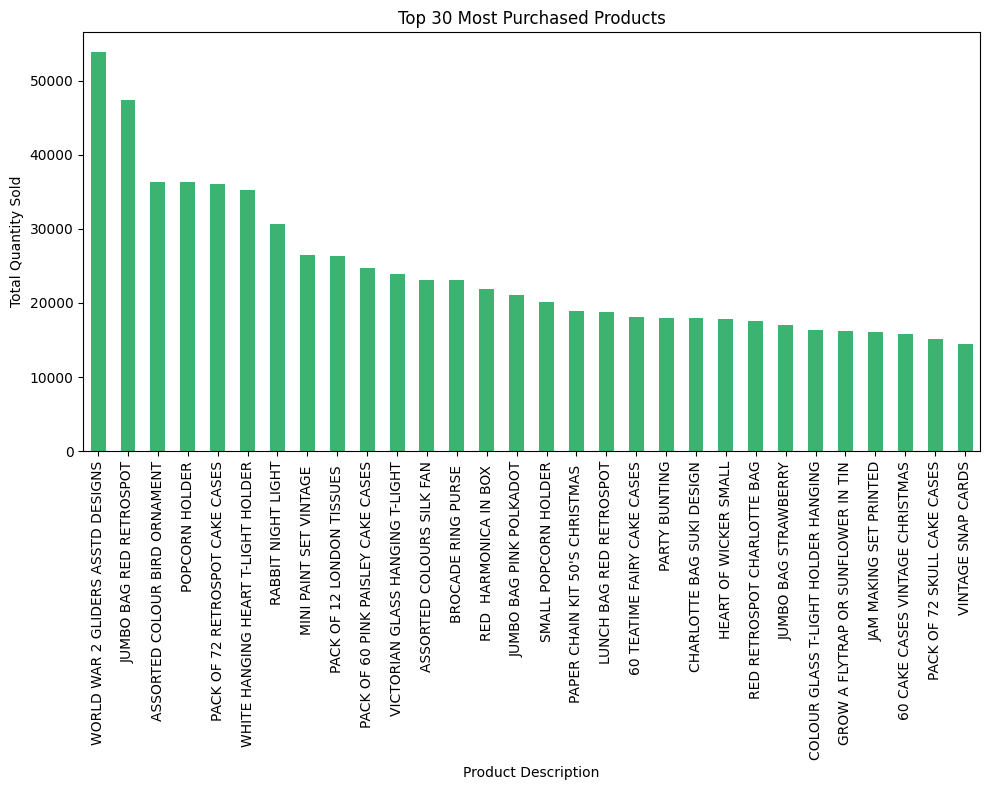

In [37]:
# Top 30 most frequently purchased products
top_products = (
    data.groupby("Description")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(30)
)

plt.figure(figsize=(10, 8))
top_products.plot(kind="bar", color="mediumseagreen")
plt.title("Top 30 Most Purchased Products")
plt.xlabel("Product Description")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [38]:
# DateTime analysis
datetime_data = cleaned_data.copy()

In [39]:
datetime_data.loc[:, "Month"] = data.InvoiceDate.dt.month
datetime_data.loc[:, "Time"] = data.InvoiceDate.dt.time
datetime_data.loc[:, "Year"] = data.InvoiceDate.dt.year
datetime_data.loc[:, "Day"] = data.InvoiceDate.dt.day
datetime_data.loc[:, "Quarter"] = data.InvoiceDate.dt.quarter
datetime_data.loc[:, "Day of Week"] = data.InvoiceDate.dt.dayofweek

In [40]:
#Mapping day of week
dayofweek_mapping = dict({0: "Monday", 
                         1: "Tuesday", 
                         2: "Wednesday" , 
                         3: "Thursday", 
                         4: "Friday", 
                         5: "Saturday", 
                         6: "Sunday"})

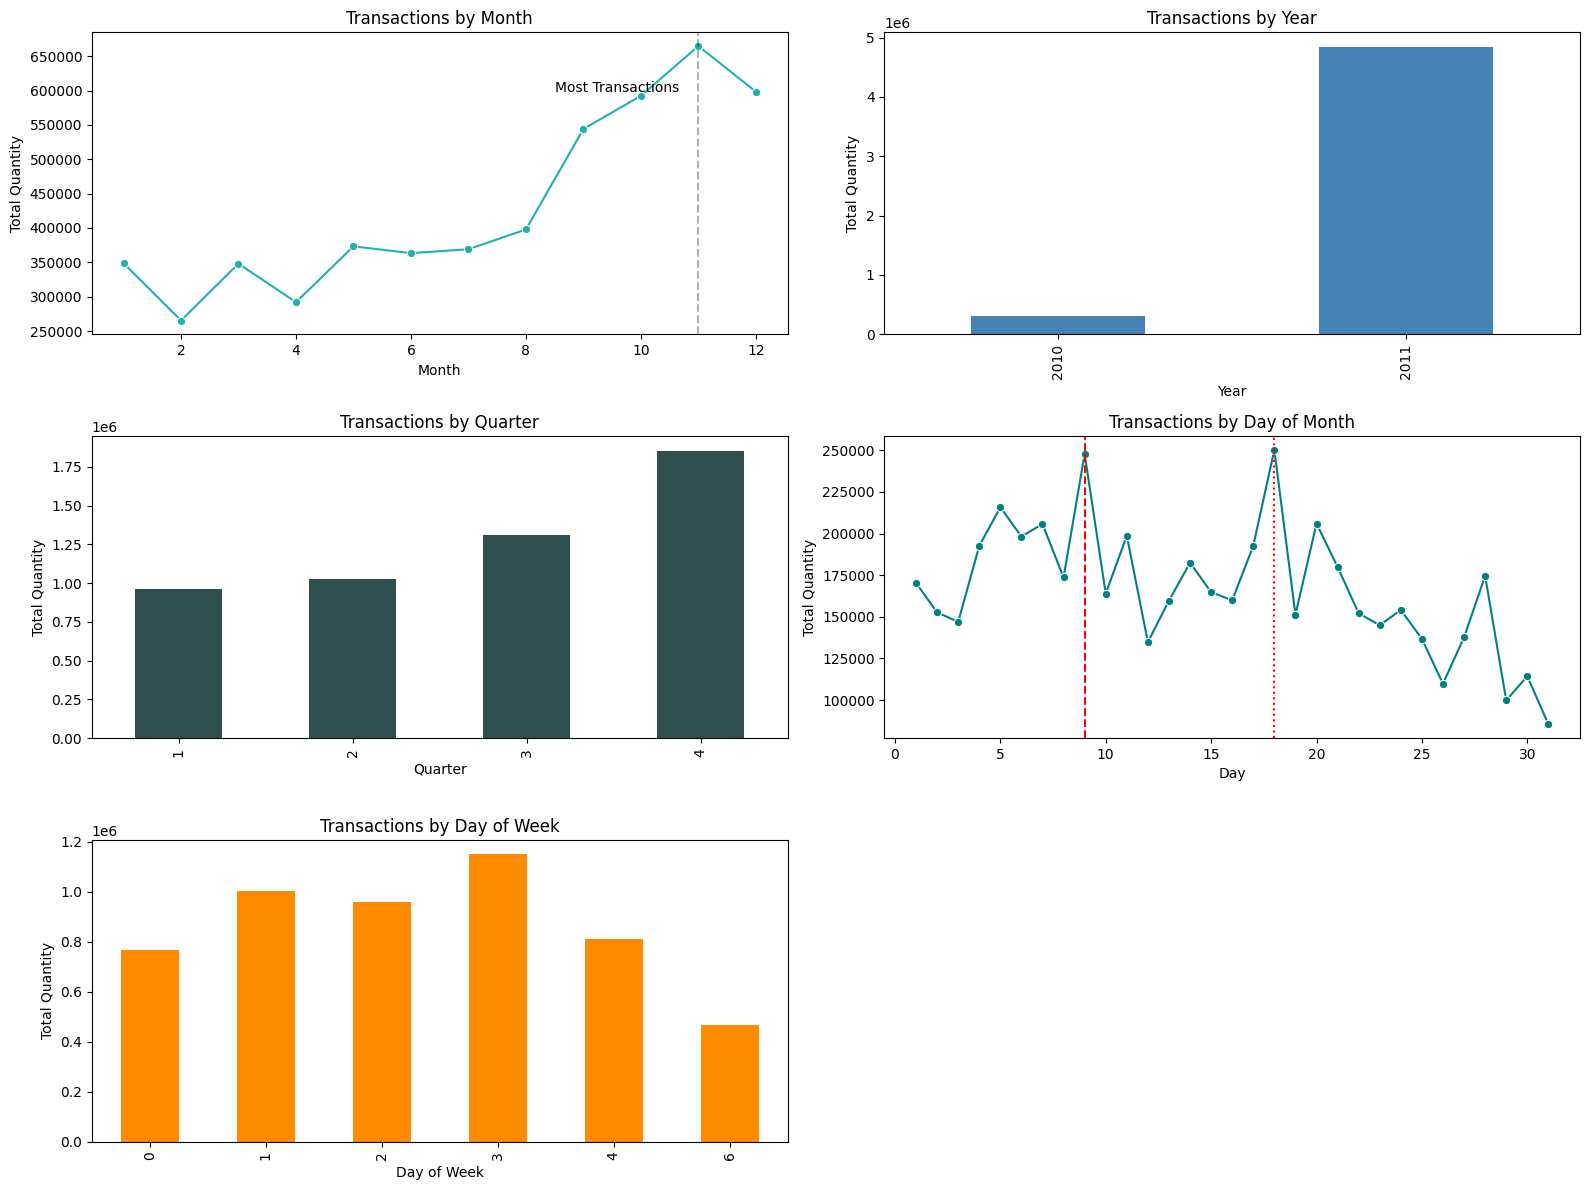

In [43]:
plt.figure(figsize=(16, 12))

# 1. Transactions by Month
plt.subplot(3, 2, 1)
monthly = datetime_data.groupby("Month")["Quantity"].sum().reset_index()
sns.lineplot(x="Month", y="Quantity", data=monthly, marker="o", color="lightseagreen")
plt.axvline(11, color="k", linestyle='--', alpha=0.3)
plt.text(8.5, monthly["Quantity"].max()*0.9, "Most Transactions")
plt.title("Transactions by Month")
plt.xlabel("Month")
plt.ylabel("Total Quantity")

# 2. Transactions by Year
plt.subplot(3, 2, 2)
yearly = datetime_data.groupby("Year")["Quantity"].sum()
yearly.plot(kind="bar", color="steelblue")
plt.title("Transactions by Year")
plt.xlabel("Year")
plt.ylabel("Total Quantity")

# 3. Transactions by Quarter
plt.subplot(3, 2, 3)
quarterly = datetime_data.groupby("Quarter")["Quantity"].sum()
quarterly.plot(kind="bar", color="darkslategrey")
plt.title("Transactions by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Total Quantity")

# 4. Transactions by Day
plt.subplot(3, 2, 4)
daily = datetime_data.groupby("Day")["Quantity"].sum().reset_index()
sns.lineplot(x="Day", y="Quantity", data=daily, marker="o", color="teal")
plt.axvline(9, color='r', linestyle='--')
plt.axvline(18, color='r', linestyle="dotted")
plt.title("Transactions by Day of Month")
plt.xlabel("Day")
plt.ylabel("Total Quantity")

# 5. Transactions by Day of Week
plt.subplot(3, 2, 5)
weekday = datetime_data.groupby("Day of Week")["Quantity"].sum()
weekday.plot(kind="bar", color="darkorange")
plt.title("Transactions by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Quantity")

plt.tight_layout()
plt.show()

- **Peak Month:** November shows the highest transaction volume, likely due to festivals(holiday shopping).
- **Peak Quarter:** Q4 is dominant, whihc is consistent with November’s spike.
- **Day of Month:** Spikes on day 9 and day 18.
- **Day of Week:**
    - Day 3 (Wednesday) has the highest transactions.
    - Day 6 (Sunday) is lowest.

- As we can see, in 2010 the transactions is quite low as compared to 2011. But as if now, we don't know the reason behind this so let's investigate why...


In [44]:
print("Total Number of Countries in 2010: {}".format(len(datetime_data[datetime_data["Year"] == 2010]["Country"].unique())))
print("Total Number of Transactions in 2010: {}".format(datetime_data[datetime_data["Year"] == 2010]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2011: {}".format(len(datetime_data[datetime_data["Year"] == 2011]["Country"].unique())))
print("Total Number of Transactions in 2011: {}".format(datetime_data[datetime_data["Year"] == 2011]["Quantity"].sum()))

Total Number of Countries in 2010: 22
Total Number of Transactions in 2010: 311840
--------------------------------------------
Total Number of Countries in 2011: 36
Total Number of Transactions in 2011: 4845514


In [46]:
_2010 = datetime_data[datetime_data["Year"] == 2010]["Country"].unique()
_2011 = datetime_data[datetime_data["Year"] == 2011]["Country"].unique()

no_cols = []

for i in (_2011):
    if i not in _2010:
        no_cols.append(i)
print("These are the values which are not present in 2010: {}".format(no_cols))

These are the values which are not present in 2010: ['Greece', 'Singapore', 'Lebanon', 'United Arab Emirates', 'Israel', 'Saudi Arabia', 'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain', 'Malta', 'RSA']


We can see that the company has started their operations in other countries and started to expand their business further.